In [41]:
#import
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
## Upload từ drive
##
import math
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'




In [42]:
# Load và đọc data

df = pd.read_csv("./MA-CK-2/MA CK 2/FPT.csv")
df.head()

,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2020,47000,FPT,45000,47000,45000,3145450
1,11/6/2020,46000,FPT,48800,48800,46000,4278060
2,10/6/2020,48800,FPT,49000,49000,48400,1307540
3,9/6/2020,48950,FPT,49600,49650,48900,1491540
4,8/6/2020,49350,FPT,49000,50000,49000,4113250


In [43]:
#Nhất quán định dạng data và kiểm tra null
df["CLOSING PRICE"] = pd.to_numeric(df["CLOSING PRICE"])
df["HIGH"] = pd.to_numeric(df["HIGH"])
df["LOW"] = pd.to_numeric(df["LOW"])
df["VOLUME"] = pd.to_numeric(df["VOLUME"])
df.isna().any()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           1252 non-null   object
 1   CLOSING PRICE  1252 non-null   int64 
 2   TICKER         1252 non-null   object
 3   OPEN           1252 non-null   int64 
 4   HIGH           1252 non-null   int64 
 5   LOW            1252 non-null   int64 
 6   VOLUME         1252 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 68.6+ KB


,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2020,47000,FPT,45000,47000,45000,3145450
1,11/6/2020,46000,FPT,48800,48800,46000,4278060
2,10/6/2020,48800,FPT,49000,49000,48400,1307540
3,9/6/2020,48950,FPT,49600,49650,48900,1491540
4,8/6/2020,49350,FPT,49000,50000,49000,4113250
...,...,...,...,...,...,...,...
1247,18/06/2015,44500,FPT,44400,45000,44400,324300
1248,17/06/2015,44400,FPT,44400,44600,44300,483360
1249,16/06/2015,44500,FPT,45000,45200,44500,479370
1250,15/06/2015,45000,FPT,45400,45400,44800,341650


In [60]:
#Chia training set và data set

data = df.filter(['CLOSING PRICE'] + ['VOLUME'] +['OPEN'] +['HIGH'] +['LOW'])
dataset = data.values
a = df.filter(['CLOSING PRICE'])

# tính số dòng sẽ lấy ra làm data để train
training_data_len = math.ceil(len(dataset ) * .8)

kq = a.values
training_data_len

# số dòng còn lại sẽ lấy ra để test 
test_len =len(dataset) -  training_data_len
kq.size

[[  47000 3145450   45000   47000   45000]
 [  46000 4278060   48800   48800   46000]
 [  48800 1307540   49000   49000   48400]
 ...
 [  44500  479370   45000   45200   44500]
 [  45000  341650   45400   45400   44800]
 [  45100  753350   44900   45300   44900]]


1252

In [45]:
#Scale data
scaler = MinMaxScaler(feature_range =(0,1))
scaler2 = MinMaxScaler(feature_range =(0,1))
# print(scaler)
scaled_kq = scaler2.fit_transform(kq)
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.3203125 , 0.45164262, 0.24427481, 0.28433269, 0.26      ],
       [0.28125   , 0.61912233, 0.38931298, 0.35396518, 0.3       ],
       [0.390625  , 0.17986979, 0.39694656, 0.36170213, 0.396     ],
       ...,
       [0.22265625, 0.0574078 , 0.24427481, 0.21470019, 0.24      ],
       [0.2421875 , 0.03704306, 0.25954198, 0.22243714, 0.252     ],
       [0.24609375, 0.09792138, 0.24045802, 0.21856867, 0.256     ]])

In [46]:
# Chia training set theo x và y
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data) - 3):
    x_train.append(train_data[i-60:i, :])
    y_train.append(scaled_kq[i + 3, 0])


In [47]:
scaled_kq

array([[0.3203125 ],
       [0.28125   ],
       [0.390625  ],
       ...,
       [0.22265625],
       [0.2421875 ],
       [0.24609375]])

In [48]:
#Chuyển sang mảng numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
#Reshape du lieu de co the su dung vao model LSTM cua python
temp = x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))
temp.shape

(939, 60, 5)

In [50]:
#xay dung LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = False, input_shape = (60,5)))
model.add(Dense(1))

In [51]:
#Su dung model
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [52]:
#Bat dau huan luyen
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
939/939 [==============================] - 7s 7ms/step - loss: 0.0095
Epoch 2/2
939/939 [==============================] - 7s 7ms/step - loss: 0.0057


In [53]:
#Tao test set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = kq[training_data_len + 3:,:]
for i in range(60, len(test_data) - 3):
    x_test.append(test_data[i-60:i, :])

In [54]:
#Chuyen sang 3d array de su dung voi LSTM
x_test = np.array(x_test)
x_test.shape


(247, 60, 5)

In [55]:
#Tao hypothesis
predictions = model.predict(x_test)
predictions = scaler2.inverse_transform(predictions)



8/8 [==============================] - 1s 5ms/step


In [56]:
predictions.shape

(247, 1)

In [57]:
#Tinh cost function
mse = np.sqrt(np.mean(predictions - y_test)**2) 
mse



310.3494116902834

      CLOSING PRICE
3             48950
4             49350
5             48700
6             48400
7             48650
...             ...
997           40400
998           40300
999           40500
1000          40400
1001          40500

[999 rows x 1 columns]
      CLOSING PRICE   Predictions
1005          40400  40301.308594
1006          40700  40368.687500
1007          40800  40431.550781
1008          40800  40438.695312
1009          40800  40473.890625
...             ...           ...
1247          44500  45241.253906
1248          44400  45151.402344
1249          44500  45118.367188
1250          45000  44721.148438
1251          45100  44440.652344

[247 rows x 2 columns]


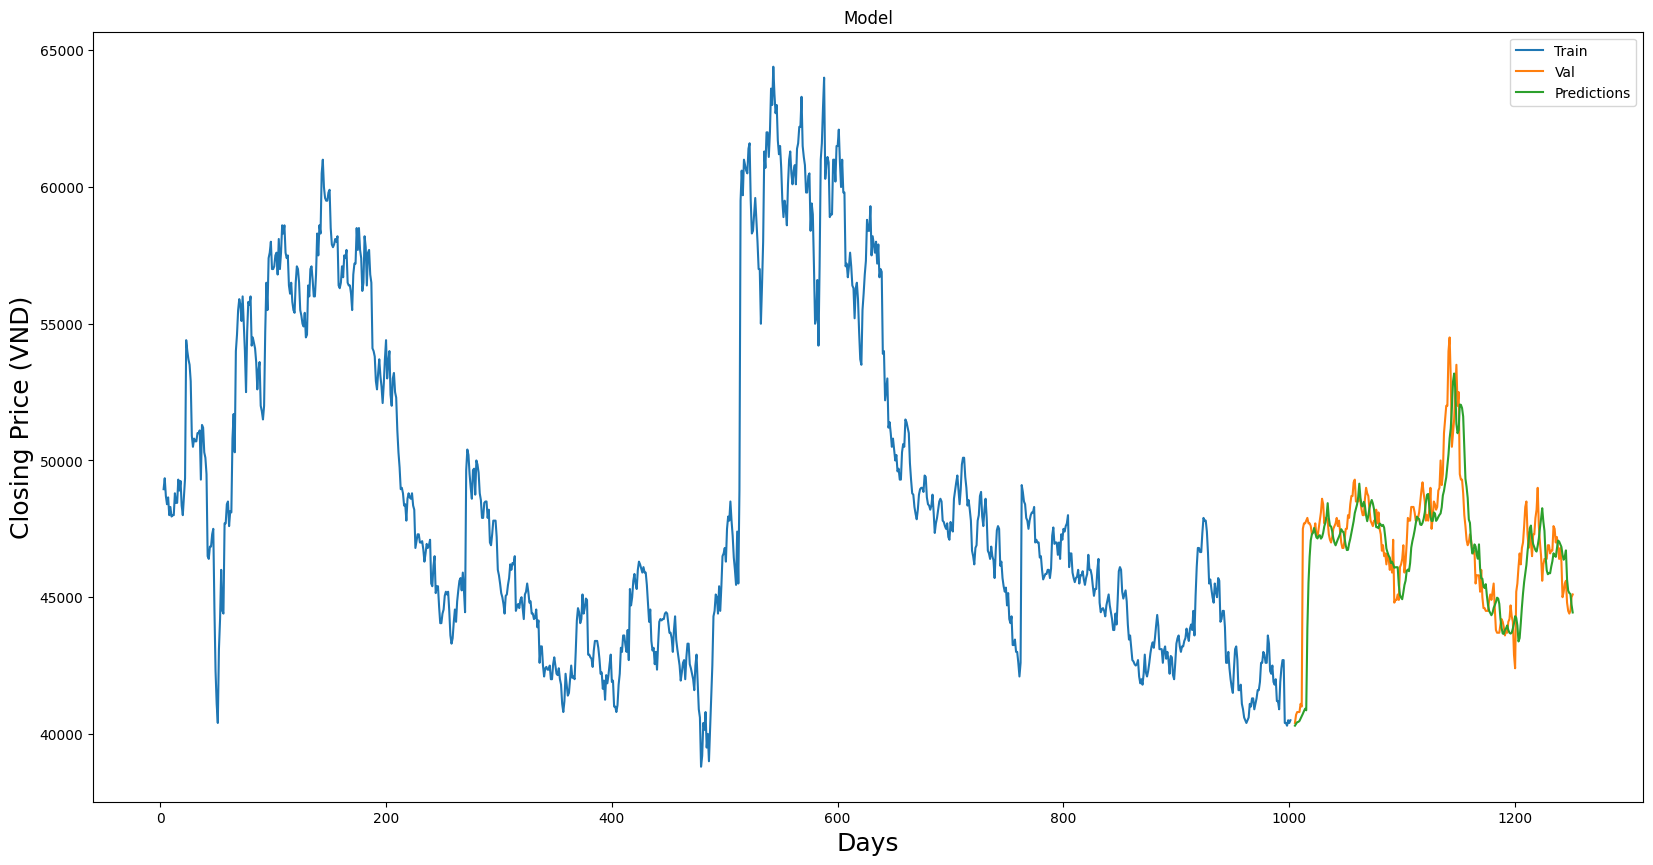

In [58]:
#Plot/Create the data for the graph
train = a[3:training_data_len]
print(train)
valid = a[training_data_len + 3:]
valid['Predictions'] = predictions
print(valid)
# 
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Closing Price (VND)', fontsize=18)
plt.plot(train['CLOSING PRICE'])
plt.plot(valid[['CLOSING PRICE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()